# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/michaelpeyser/Desktop/pythonapichallenge/06-Python-APIs/Instructions/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
cloud_data = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_mph = []
country = []

count = 0


for city in cities:
    try:
        base_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
        response= requests.get(base_url).json()
        #pprint(response)
        country.append(response["sys"]["country"])
        cloud_data.append(response["clouds"]["all"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"]* 9/5-459.67)
        wind_mph.append(response["wind"]["speed"])
        count = count + 1
        if response["wind"]["speed"] == None:
            next 
        else:
            city_name.append(city)
        print(f"Processing Record {count} | {city}")
    except Exception:
        print("City Not Found...")
        
    
                
                

Processing Record 1 | butaritari
Processing Record 2 | beloha
Processing Record 3 | mataura
Processing Record 4 | westport
Processing Record 5 | bluff
Processing Record 6 | busselton
Processing Record 7 | mount gambier
Processing Record 8 | kirkland lake
Processing Record 9 | kapaa
Processing Record 10 | denizli
Processing Record 11 | hobart
Processing Record 12 | dikson
Processing Record 13 | jamestown
Processing Record 14 | atuona
Processing Record 15 | castro marim
Processing Record 16 | ovsyanka
Processing Record 17 | port-cartier
Processing Record 18 | barrow
Processing Record 19 | bredasdorp
Processing Record 20 | rikitea
Processing Record 21 | punta arenas
Processing Record 22 | bakchar
Processing Record 23 | nakhon thai
Processing Record 24 | ushuaia
Processing Record 25 | ostersund
Processing Record 26 | fairbanks
Processing Record 27 | vaini
Processing Record 28 | victoria
Processing Record 29 | kodiak
Processing Record 30 | georgetown
Processing Record 31 | bathsheba
Process

Processing Record 242 | dalbandin
Processing Record 243 | zhezkazgan
Processing Record 244 | la ronge
Processing Record 245 | nyurba
Processing Record 246 | vostok
Processing Record 247 | geraldton
Processing Record 248 | zhigansk
Processing Record 249 | labuhan
Processing Record 250 | coro
Processing Record 251 | chicama
Processing Record 252 | suicheng
Processing Record 253 | leningradskiy
Processing Record 254 | bethel
Processing Record 255 | lanigan
Processing Record 256 | mangaratiba
Processing Record 257 | lasa
Processing Record 258 | vigrestad
Processing Record 259 | bam
Processing Record 260 | tecpan
Processing Record 261 | tigil
Processing Record 262 | pevek
Processing Record 263 | palmer
Processing Record 264 | ulladulla
City Not Found...
Processing Record 265 | sorland
Processing Record 266 | hofn
Processing Record 267 | vaitape
Processing Record 268 | half moon bay
Processing Record 269 | arraial do cabo
Processing Record 270 | mezen
Processing Record 271 | kurilsk
Processi

Processing Record 479 | gorontalo
Processing Record 480 | quelimane
Processing Record 481 | fontanka
Processing Record 482 | beringovskiy
Processing Record 483 | knyaze-volkonskoye
Processing Record 484 | maba
Processing Record 485 | dong xoai
Processing Record 486 | murmashi
Processing Record 487 | muli
City Not Found...
Processing Record 488 | kargasok
Processing Record 489 | challapata
Processing Record 490 | yatou
Processing Record 491 | asau
Processing Record 492 | domoni
Processing Record 493 | kasongo-lunda
Processing Record 494 | ponta do sol
Processing Record 495 | farafangana
Processing Record 496 | quartucciu
Processing Record 497 | mogadishu
Processing Record 498 | aksu
City Not Found...
Processing Record 499 | south sioux city
Processing Record 500 | taybad
Processing Record 501 | rio cuarto
City Not Found...
Processing Record 502 | abu zabad
Processing Record 503 | teluk nibung
Processing Record 504 | nalut
City Not Found...
Processing Record 505 | odweyne
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = {"City": city_name,
               "Cloudiness": cloud_data,
               "Date": date,
               "Country": country,
               "Humidity": humidity,
               "Lat": lat,
               "Lon": lng,
               "Max Temp": max_temp,
               "Wind MPH": wind_mph }

In [23]:
weather_df = pd.DataFrame(weather_data)
weather_df.head(25)

weather_df.to_csv('output_data_file')


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

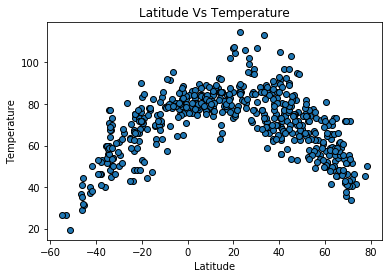

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolors = "black")
plt.title("Latitude Vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

## Latitude vs. Humidity Plot

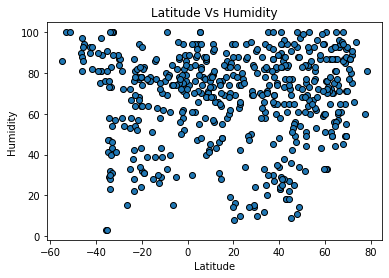

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors = "black")
plt.title("Latitude Vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

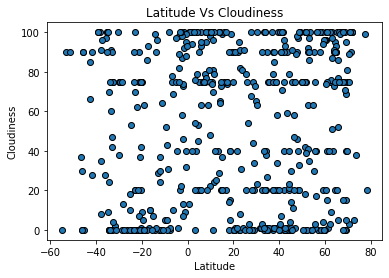

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors = "black")
plt.title("Latitude Vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

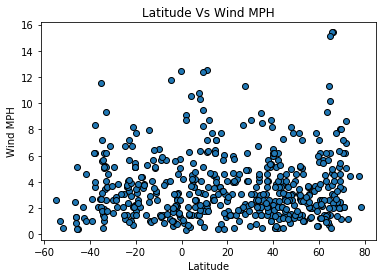

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Wind MPH"], edgecolors = "black")
plt.title("Latitude Vs Wind MPH")
plt.xlabel("Latitude")
plt.ylabel("Wind MPH")
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x,y):
    correlation = st.pearsonr(x,y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    print(line_eq)
linear_regression(weather_df["Lat"], weather_df["Max Temp"])
linear_regression(weather_df["Lat"], weather_df["Humidity"])
linear_regression(weather_df["Lat"], weather_df["Cloudiness"])
linear_regression(weather_df["Lat"], weather_df["Wind MPH"])

y = 0.01x + 70.54
y = 0.03x + 67.27
y = 0.15x + 48.52
y = 0.0x + 3.53


In [14]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = weather_df.loc[(weather_df["Lat"]> 0)]
south_hemi = weather_df.loc[(weather_df["Lat"]< 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

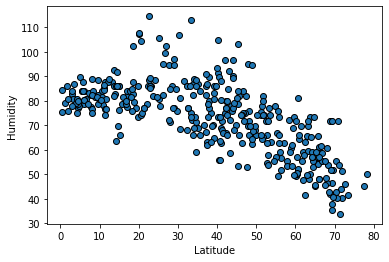

y = -0.48x + 91.52


In [15]:
plt.scatter(north_hemi["Lat"], north_hemi["Max Temp"], edgecolors= "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
linear_regression(north_hemi["Lat"], north_hemi["Max Temp"])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

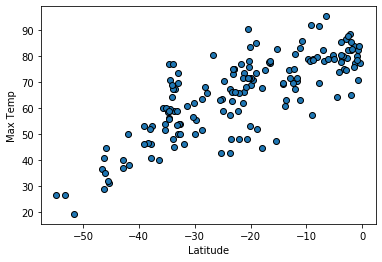

y = 0.9x + 84.82


In [16]:
plt.scatter(south_hemi["Lat"], south_hemi["Max Temp"], edgecolors= "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
linear_regression(south_hemi["Lat"], south_hemi["Max Temp"])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

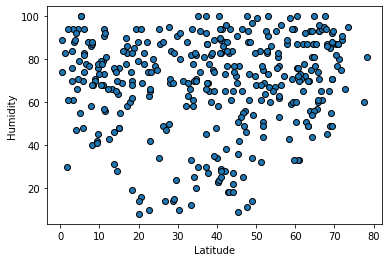

y = 0.06x + 65.83


In [17]:
plt.scatter(north_hemi["Lat"], north_hemi["Humidity"], edgecolors= "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
linear_regression(north_hemi["Lat"], north_hemi["Humidity"])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

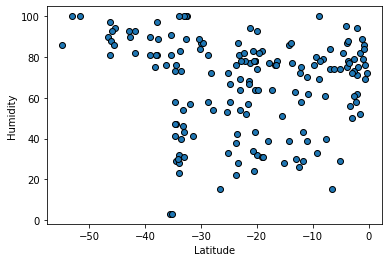

y = -0.16x + 63.12


In [18]:
plt.scatter(south_hemi["Lat"], south_hemi["Humidity"], edgecolors= "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
linear_regression(south_hemi["Lat"], south_hemi["Humidity"])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

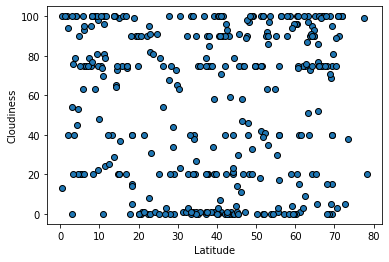

y = -0.01x + 55.74


In [19]:
plt.scatter(north_hemi["Lat"], north_hemi["Cloudiness"], edgecolors= "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
linear_regression(north_hemi["Lat"], north_hemi["Cloudiness"])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

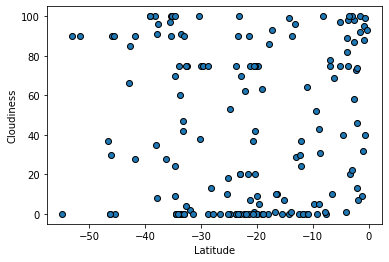

y = 0.13x + 45.49


In [20]:
plt.scatter(south_hemi["Lat"], south_hemi["Cloudiness"], edgecolors= "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
linear_regression(south_hemi["Lat"], south_hemi["Cloudiness"])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

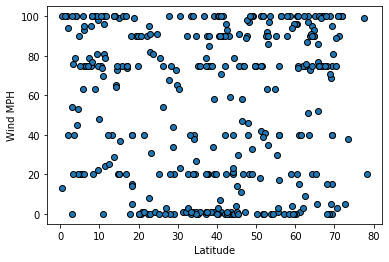

y = 0.0x + 3.68


In [21]:
plt.scatter(north_hemi["Lat"], north_hemi["Cloudiness"], edgecolors= "black")
plt.xlabel("Latitude")
plt.ylabel("Wind MPH")
plt.show()
linear_regression(north_hemi["Lat"], north_hemi["Wind MPH"])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

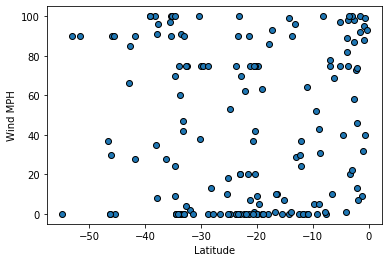

y = 0.0x + 3.48


In [22]:
plt.scatter(south_hemi["Lat"], south_hemi["Cloudiness"], edgecolors= "black")
plt.xlabel("Latitude")
plt.ylabel("Wind MPH")
plt.show()
linear_regression(south_hemi["Lat"], south_hemi["Wind MPH"])